# DAT_SF_13 Midterm Homework 4

###About the data
For this midterm, you'll be working with a dataset related to classifying emails as spam. The dataset was built by researchers at the UCI Machine Learning Institute. The following link is for reference only; the spam dataset is included in our github repo, in the HW4 directory. _Be sure to use the dataset provided in our course github repo._

http://archive.ics.uci.edu/ml/datasets/Spambase

**Data Set Information:**

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...

**Attribute Information:**

The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters.

###Definitions of the attributes:

**48 continuous real [0,100] attributes of type word_freq_WORD**

= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

**6 continuous real [0,100] attributes of type char_freq_CHAR**

= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail

**1 continuous real [1,...] attribute of type capital_run_length_average**

= average length of uninterrupted sequences of capital letters

**1 continuous integer [1,...] attribute of type capital_run_length_longest**

= length of longest uninterrupted sequence of capital letters

**1 continuous integer [1,...] attribute of type capital_run_length_total**

= sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail

**1 nominal {0,1} class attribute of type spam**

= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',60)
from sklearn import neighbors, datasets, feature_selection
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

%matplotlib inline

In [36]:
# Load the spambase.csv as a pandas DataFrame (last column of data contains Target Data - is_spam)
spam_data = pd.read_csv("spambase.csv")
#spam_data.head()
# spam_data.describe()
spam_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4601 entries, 0 to 4600
Data columns (total 58 columns):
word_freq_make                4601 non-null float64
word_freq_address             4601 non-null float64
word_freq_all                 4601 non-null float64
word_freq_3d                  4601 non-null float64
word_freq_our                 4601 non-null float64
word_freq_over                4601 non-null float64
word_freq_remove              4601 non-null float64
word_freq_internet            4601 non-null float64
word_freq_order               4601 non-null float64
word_freq_mail                4601 non-null float64
word_freq_receive             4601 non-null float64
word_freq_will                4601 non-null float64
word_freq_people              4601 non-null float64
word_freq_report              4601 non-null float64
word_freq_addresses           4601 non-null float64
word_freq_free                4601 non-null float64
word_freq_business            4601 non-null float64
word_freq

In [37]:
spam_data_plot = spam_data
#spam_data_plot['Target'] = spam_data_plot.is_spam
spam_data_plot.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

###Exercise 1: Explore the dataset and display some visualizations showing how the variables relate to each other

In [ ]:
sns.pairplot(spam_data, hue = 'is_spam', size = 2.3)

###Exercise 2: Build a simple logistic regression and visualize it
use the variable "capital_run_length_longest" to predict "is_spam" How accurate is this single feature?

In [26]:
#your code here
#fill na, define features and target numpy arrays
numerical_features = spam_data.get(['capital_run_length_longest'])
features_array = numerical_features.fillna(numerical_features.dropna().median()).values
target = spam_data.is_spam.values

# train test split
features_train, features_test, target_train, target_test = train_test_split(features_array, target, test_size=0.30, random_state=12)

# train logistic regression, evaluate on test
lr = LogisticRegression(C=1)
lr.fit(features_train, target_train)
target_predicted = lr.predict(features_test)

print(target_test.mean())
print(target_predicted.mean())

print(classification_report(target_test, target_predicted,
                            target_names=['not_spam', 'is_spam']))

0.380883417813
0.207096307024
             precision    recall  f1-score   support

   not_spam       0.72      0.92      0.81       855
    is_spam       0.77      0.42      0.54       526

avg / total       0.74      0.73      0.71      1381



###Exercise 3: Use train-test spit to split your data at a 30% mark and run another logistic regression using all variables
use random state = 12 so that we can compare results

In [25]:
#spam_data.columns.values
numerical_features_all = spam_data.get(['word_freq_make', 'word_freq_address', 'word_freq_all',
       'word_freq_3d', 'word_freq_our', 'word_freq_over',
       'word_freq_remove', 'word_freq_internet', 'word_freq_order',
       'word_freq_mail', 'word_freq_receive', 'word_freq_will',
       'word_freq_people', 'word_freq_report', 'word_freq_addresses',
       'word_freq_free', 'word_freq_business', 'word_freq_email',
       'word_freq_you', 'word_freq_credit', 'word_freq_your',
       'word_freq_font', 'word_freq_000', 'word_freq_money',
       'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs',
       'word_freq_telnet', 'word_freq_857', 'word_freq_data',
       'word_freq_415', 'word_freq_85', 'word_freq_technology',
       'word_freq_1999', 'word_freq_parts', 'word_freq_pm',
       'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total'])
features_array = numerical_features_all.fillna(numerical_features.dropna().median()).values
target = spam_data.is_spam.values

features_train, features_test, target_train, target_test = train_test_split(features_array, target, test_size=0.30, random_state=12)

lr = LogisticRegression(C=1)
lr.fit(features_train, target_train)
target_predicted = lr.predict(features_test)

print(target_test.mean())
print(target_predicted.mean())


print(classification_report(target_test, target_predicted,
                            target_names=['not_spam', 'is_spam']))

0.380883417813
0.373642288197
             precision    recall  f1-score   support

   not_spam       0.94      0.95      0.95       855
    is_spam       0.92      0.90      0.91       526

avg / total       0.93      0.93      0.93      1381



###Exercise 4: Apply cross validation to see how the model fares across different splits of your data
Use cross validation to score your model

In [56]:
scores = cross_val_score(lr, numerical_features_all, target, cv = 5)
print scores.mean()

0.913261948561


###Exercise 5: Compare Performance of Logistic Regression to KNN with 3 neighbors
Which model is more accurate?

In [55]:
clf = neighbors.KNeighborsClassifier(3, weights = 'uniform')
clf.fit(numerical_features_all,target)

scores = cross_val_score(clf, numerical_features_all, target, cv = 5).mean()
print scores

0.7763303123


The first model is more accurate likely because it includes more relevant variables than the first one, which had just one.

###Exercise 6: Evaluate Feature Importance
Which features are the most influential in this model?

In [22]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)
model.fit(features_array,target)
model.feature_importances_
feature_cols = ['word_freq_make', 'word_freq_address', 'word_freq_all',
       'word_freq_3d', 'word_freq_our', 'word_freq_over',
       'word_freq_remove', 'word_freq_internet', 'word_freq_order',
       'word_freq_mail', 'word_freq_receive', 'word_freq_will',
       'word_freq_people', 'word_freq_report', 'word_freq_addresses',
       'word_freq_free', 'word_freq_business', 'word_freq_email',
       'word_freq_you', 'word_freq_credit', 'word_freq_your',
       'word_freq_font', 'word_freq_000', 'word_freq_money',
       'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs',
       'word_freq_telnet', 'word_freq_857', 'word_freq_data',
       'word_freq_415', 'word_freq_85', 'word_freq_technology',
       'word_freq_1999', 'word_freq_parts', 'word_freq_pm',
       'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total']
pd.DataFrame({'features':feature_cols, 'importance':model.feature_importances_}).sort('importance', ascending = False)

,features,importance
52,char_freq_$,0.328226
6,word_freq_remove,0.151896
51,char_freq_!,0.096587
56,capital_run_length_total,0.048919
24,word_freq_hp,0.045691
15,word_freq_free,0.036071
55,capital_run_length_longest,0.027357
45,word_freq_edu,0.024717
54,capital_run_length_average,0.024306
18,word_freq_you,0.024219


The most siginificant factors appear to be whether the '$' or '!' signs are used as well as the word 'remove'.

###Exercise 7: Plot the ROC Curve for the logistic regression you chose¶

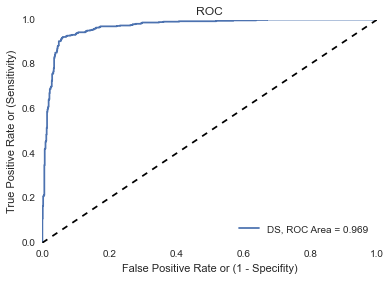

In [24]:
proba_lr  = lr.predict_proba(features_test)


from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def plot_roc_curve(target_test, target_predicted_proba, this_label):
    fpr, tpr, thresholds = roc_curve(target_test, target_predicted_proba[:, 1])
    
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.plot(fpr, tpr, label= this_label + ', ROC Area = %0.3f' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('ROC')
    plt.legend(loc="lower right")
    
plot_roc_curve(target_test, proba_lr, "DS")


###Exercise 8: Demonstrate how the accurary of your predictions changes when you set your threshold to levels other than 50%

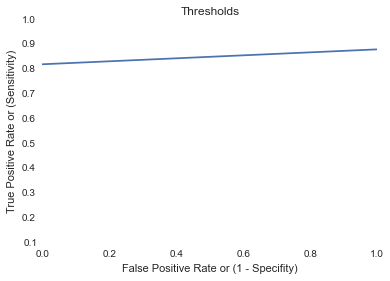

In [83]:
predicted_proba_spam = proba_lr[:,1]

from sklearn.metrics import accuracy_score
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
acc_thresh = []

for i in range(len(thresholds)):
   preds = []
   preds = [1 if x > thresholds[i] else 0 for x in predicted_proba_spam]
   acc_thresh.append(accuracy_score(target_test,preds))
  
#plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.1,1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Thresholds')
plt.legend(loc="lower right")
plt.plot(acc_thresh)



###Exercise 9: Discuss the pro's/con's of moving the threshold away from 50%, why is/isn't this a good idea?

When we set the threshold higher than 50%, the accuracy goes down but the number of false positives are reduced, whereas the lower it is the higher the accuracy. 